# Самостоятельный проект. Принятие решений в бизнесе.

***Описание проекта***

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

***Цели проекта***

Проект состоит из двух частей:
- Приоритезация гипотез
- Анализ A/B-теста


## Подготовка и получения данных.

### Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

### Работа с данными.

#### Чтение файлов

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Приоритезация гипотез.

### Предобработка и проверка данных hypothesis.

Для начала проведем первоначальный анализ данных.

Будем проверять:
* Названия столбцов
* Наличие пропусков и дубликатов в данных
* Влияние пропусков и дубликатов на датафрейм
* Тип данных в датафрейме


Так как датафрейм всего состоит из 9 строк, то выведем его весь на экран, для просмотра всех данных.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Названия столбцов лучше привести к змеинному регистру. Пропусков в датафрейме нет. Оценки в пределах заявленных границ.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Лучше пронумеровать гипотезы, сейчас они нечитаемые.
Добавим новый столбец `hypothesis_id` и поменяем порядок столбцов.

In [5]:
hypothesis['hypothesis_id'] = [1,2,3,4,5,6,7,8,9]
hypothesis = hypothesis[['hypothesis_id', 'hypothesis', 'reach', 'impact', 'confidence', 'efforts']]
hypothesis

,hypothesis_id,hypothesis,reach,impact,confidence,efforts
0,1,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,2,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,4,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,7,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,8,Добавить форму подписки на все основные страни...,10,7,8,5
8,9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Так будет проще. Все данные в нужном формате.

### Применение способа приоритезации гипотез ICE & RICE.

Проведем приоритезацию гипотез методами `ICE` & `RICE`. Для использования этого метода у нас есть все необходимые данные:

* Reach — скольких пользователей затронет изменение, которое вы хотите внести;
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
* Efforts — сколько стоит протестировать эту гипотезу.

Добавим столбец `ICE` и выведем на экран гипотезы по значению ICE в порядке убывания. Для наглядности - окгруглим данные до второго знака.

In [6]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
pd.options.display.max_colwidth = 400
display(hypothesis[['hypothesis_id','hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).round(2))

,hypothesis_id,hypothesis,ICE
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


В приоритете гипотезы под номерами: 9, 1, 8, 7. Посмотрим, какой приоритет будет по RICE.

In [7]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'].round(2)
display(hypothesis[['hypothesis_id','hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis_id,hypothesis,RICE
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По `RICE` у нас в приоритете гипотезы под номером - 8, 3, 1, 7 (гипотезы под номером 1 и 7 по `RICE` получают одинаковый приоритет).

Посмотрим на таблицу с показателями `ICE` & `RICE`, чтобы сравнить результаты.

In [8]:
display(hypothesis)

,hypothesis_id,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Мы получили разные приоритеты, используя разные показатели.

При проверке гипотез методом `ICE` в приоритет попали 9, 1, 8, 7. А при приоритезации по `RICE` - 8, 3, 1, 7 соответственно.

И там, и там в топ-4 попали гипотезы 1, 8 и 7. Несмотря на это у них разные приоритеты. Почему так произошло? Потому что показатель `ICE` не учитывает охват пользователей, и именно поэтому гипотеза номер 9 спустилась на 5 место, а гипотеза №3 поднялась с 5 на второе место. Охват пользователей тоже важен, поэтому используя данные показателей `RICE` - составим список топ-4 гипотез.

In [9]:
hypothesis.sort_values(by = ['RICE'], ascending = False).head(4)

,hypothesis_id,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0


## Анализ A/B теста.

### Предобработка данных

#### Предобработка `orders`

Проверим, какие данные хранятся в `orders`.

In [10]:
orders.sort_values(by='date')

,transactionId,visitorId,date,revenue,group
168,2065527789,1581167209,2019-08-01,1780,A
73,1295850747,2947100995,2019-08-01,29499,A
72,477940151,1422773200,2019-08-01,700,A
71,3679129301,8300375,2019-08-01,10510,B
70,3574407166,2328378067,2019-08-01,8999,B
...,...,...,...,...,...
1021,969750843,4120364173,2019-08-31,15500,B
1022,2411823395,3788724847,2019-08-31,2610,A
1023,2886170101,930758570,2019-08-31,6674,B
995,3465107905,2075883701,2019-08-31,2610,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет, но с названиям столбцов и формат даты надо исправить. Приведем названия к змеинному регистру, а формат даты изменим на нужный нам.

In [12]:
orders.columns=['order_id', 'user_id', 'date', 'revenue', 'group']

In [13]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#использование lambda функци для изменения типа данных даты

Проверим, нет ли пользователей, которые входят в обе группы.

In [14]:
orders_ab = orders.groupby('user_id')
orders_ab = orders_ab['group'].nunique().reset_index()
orders_ab = orders_ab.query('group > 1')['user_id']

orders = orders.query('user_id not in @orders_ab')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1016 non-null   int64         
 1   user_id   1016 non-null   int64         
 2   date      1016 non-null   datetime64[ns]
 3   revenue   1016 non-null   int64         
 4   group     1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Впринципе у нас неплохое распределение по кол-ву пользователей в группе. 46%/54%, отклонение не более 5%.

Теперь тип данных и названия столбцов нас устраивает. Перейдем к предобработке `visitors`.

#### Предобработка `visitors`

Посмотрим на сами данные в таблице и выведем общую информацию по датафрейму.

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, но формат даты снова надо исправить.

In [17]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
) #использование lambda функци для изменения типа данных даты

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь все ок, можем начать работать с этими данными.

### Графики кумулятивной выручки по группам.

Для начала выполним следующие шаги:
1) Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавьтесь от дубликатов методом drop_duplicates().
2) Объявим переменную ordersAggregated, содержащую:
* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.
3) Объявите переменную visitorsAggregated, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно.
4) ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group' в указанном порядке.
5) Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
6) Присвойте столбцам cumulativeData названия `['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']`

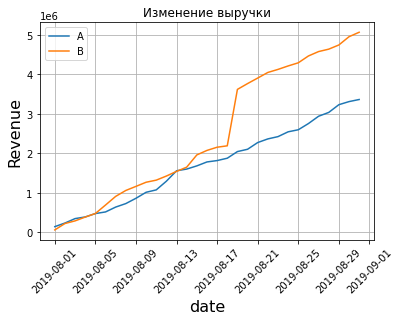

In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.xlabel('date', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.title('Изменение выручки')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

Примерно с середины теста пользователи группы начали приносить больше выручки. Есть несколько предположений по этому поводу:
* Есть аномально дорогие заказы в группе B
* Пользователи группы B, стали делать больше заказов, чем пользователи группы A
* Возможно и то, и другое

Проверим графики по изменению среднего чека.

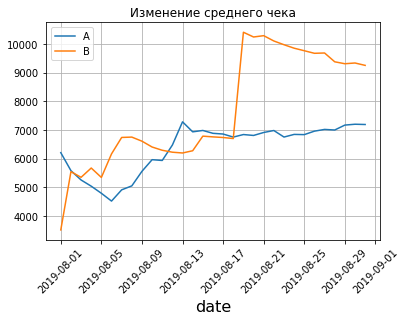

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xlabel('date', fontsize=16)
plt.title('Изменение среднего чека')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

Кумулятивные значения среднего чека по группам сильно колеблются. Принимать решение по этому графику рано, надо провести дополнительный анализ выбросов. Посмотрим график относительного изменения кумулятивного среднего чека группы B к группе A.
Можем отметить, что средний чек пользователей группы Б сильно изменился во второй половине теста.

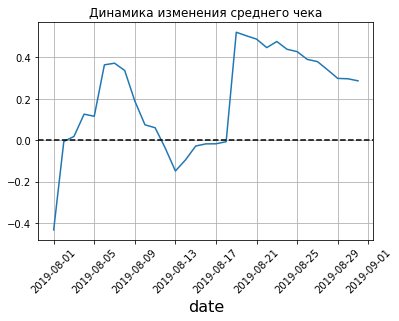

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.xlabel('date', fontsize=16)
plt.title('Динамика изменения среднего чека')
plt.xticks(rotation=45)
plt.show()

Результаты теста значительно менялись в середине теста. Скорее всего именно в этот период были совершены аномальные заказы. Посмотрим на график кумулятивной конверсии.

Для начала добавим столбец `conversion` и затем построим график.

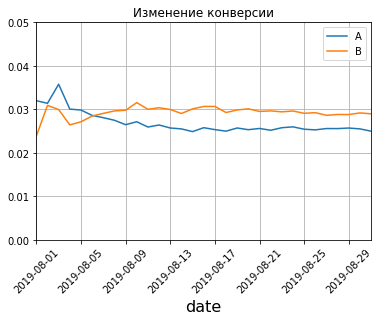

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.xlabel('date', fontsize=16)
plt.title('Изменение конверсии')
plt.xticks(rotation=45)
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

Конверсия пользователей из группы B первые несколько дней теста была равна, конверсии пользователей А, но затем конверсия пользователей В продолжила расти, а конверсия пользователей А начала падать. Разница зафиксировалась примерно на отметке в 5%.

Построим график относительного изменения кумулятивной конверсии группы В к группе А.

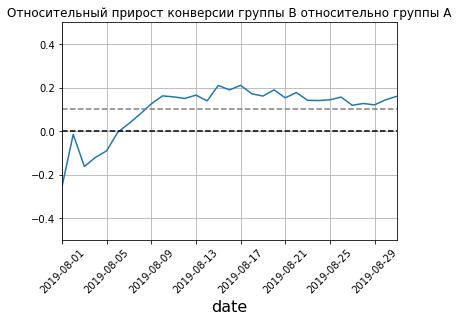

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
pd.to_datetime(mergedCumulativeConversions['date'])
plt.plot(
         mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
        )
plt.grid()
plt.xlabel('date', fontsize=16)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=45)



plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max(), -0.5, 0.5])

plt.show()

В первые 4 дня конверсия пользователей группы В была ниже примерно на 20%, но начиная с пятого дня конверсия пользователей стала расти.Спустя 10 дней конверсии отличались почти на 20%, а ниже отметки в 10% конверсия с 06.08.2019 не опускалась. 

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


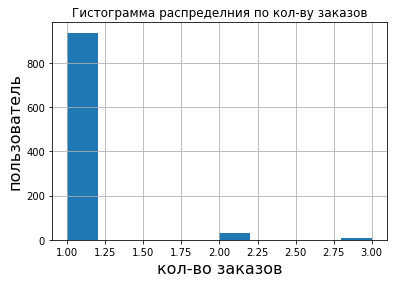

In [24]:
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) 
plt.grid()
plt.xlabel('кол-во заказов', fontsize=16)
plt.ylabel('пользователь', fontsize=16)
plt.title('Гистограмма распределния по кол-ву заказов')
plt.show()

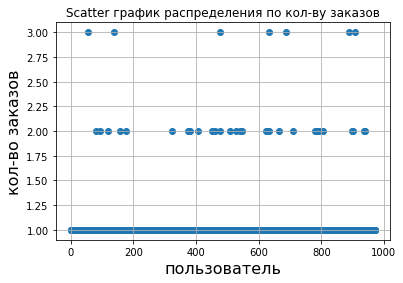

In [25]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.xlabel('пользователь', fontsize=16)
plt.ylabel('кол-во заказов', fontsize=16)
plt.title('Scatter график распределения по кол-ву заказов')
plt.show()

Есть несколько пользователей, которые сделали 2 и более заказов. Проверим перцентили.

In [26]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([1., 2.])

Не более 5% пользователей делали более 1 заказа. Не более 1% делали 2 и более заказов.

Построим гистограмму и scatter график распределения выручек.

,order_id,user_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


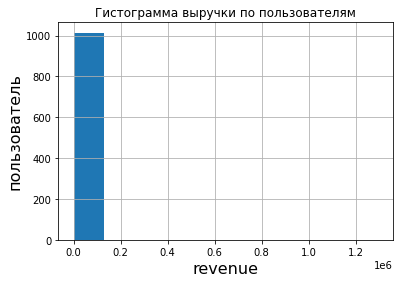

In [27]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
plt.hist(orders['revenue'],bins = 10) 
plt.grid()
plt.xlabel('revenue', fontsize=16)
plt.ylabel('пользователь', fontsize=16)
plt.title('Гистограмма выручки по пользователям')
plt.show()

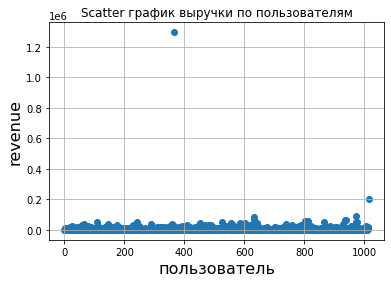

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.xlabel('пользователь', fontsize=16)
plt.ylabel('revenue', fontsize=16)
plt.title('Scatter график выручки по пользователям')
plt.show()

* Есть заказ на 1,3 млн рублей, который явно аномален. 
* Заказов выше 100000 рублей не очень много, есть выброс в районе 200000 рублей.

Посчитаем перцентили для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


* Не более чем у 5% чек дороже 26500 рублей.
* Не более чем у 1% чек дороже 53500 рублей.

Сформулируем гипотезы для проверки.

Н0:

В конверсии между группами нет статистически значимых различий.

Н1:
В конверсии между группами есть статистически значимые различия.

Проверим её по "сырым данным".

In [30]:
#Строим датафрейм по группе А по кол-ву посещений в день.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Строим датафрейм по группе В по кол-ву посещений в день.
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#Строим датафрейм по группе А по кол-ву заказов в день.
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
#Строим датафрейм по группе А по кол-ву заказов в день.
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#Объединяем все в общий датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()
#Строим датафрейм по группе А по кол-ву заказов по пользователям
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']
#Строим датафрейм по группе А по кол-ву заказов по пользователям
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value: 0.01102'

'0.160'

P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 16%.

Осталось сравнить средние чеки по "сырым данным", а затем обе метрики еще раз после удаления выбросов.

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value больше 0.05 - статистически значимых отличиий в среднем чеке между группа нет. 
Наблюдаем различие в 28%, которое исходя из нашего исследования не является статистически значимым.

Приступим к анализу аномалий.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['user_id'],
    ],
    axis=0,
)
revenue_lim = 26500
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['user_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: user_id, dtype: int64


Мы получили множество аномальных пользователей. После их удаления будем считать статистическую значимость. Надо выяснить есть ли существенный различия между группами с очищенными данными.

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01723
0.172


Как и в случае с "сырыми данными", статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.693
-0.042


* p-value = 0.84, это значительно выше 0.05. Как и по сырым данным - статистически значимого различия между группами нет.

## Результаты A/B теста.

Вот результаты проекта в сборе:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: пользователи группы В имеют тенденцию к росту, либо зафиксировались около среднего значения.

* График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Исходя из теста, делаем вывод, что в А/B тесте за счет увеличения конверсии побеждает Группа B.
